### 1. Import Library

Penjelasan: Mengimpor semua library yang diperlukan untuk analisis data, pembuatan model, dan visualisasi.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc

### load data 

In [2]:
# Mengimpor data dari file Excel
file_path = r"C:\Users\User\Documents\Modul Data Mining\Klasifikasi_random forest\Dataset titanic\titanic2.xlsx"  # Ganti dengan path file Excel Anda
data = pd.read_excel(file_path)

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 2. Data Cleaning

Penjelasan: Mengatasi nilai yang hilang dan menghapus kolom yang tidak relevan dari dataset.

In [4]:
# Mengisi nilai yang hilang dengan rata-rata umur
data['Age'] = data['Age'].fillna(data['Age'].mean())

# Mengisi nilai yang hilang dengan mode untuk kolom 'Embarked'
data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode()[0])

# Menghapus kolom yang tidak diperlukan
data = data.drop(columns=['Cabin', 'Ticket'])

In [5]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


### 3. Data Transformation

Penjelasan: Mengonversi data kategorik menjadi format numerik untuk digunakan dalam model.

In [6]:
# One-hot encoding
data = pd.get_dummies(data, columns=['Sex', 'Embarked'], drop_first=True, dtype=int)  # One-hot encoding dengan dtype=int

In [7]:
data.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,7.2500,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,71.2833,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,7.9250,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,53.1000,0,0,1
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,8.0500,1,0,1


### 4. Data Reduction

Penjelasan: Memilih fitur dan target untuk pelatihan model.

In [8]:
X = data[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_male', 'Embarked_Q', 'Embarked_S']]
y = data['Survived']

### 5. Pattern Evaluation

Penjelasan: Membagi data menjadi set pelatihan dan pengujian, kemudian melatih model Random Forest.

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # Pembagian data
model = RandomForestClassifier(n_estimators=100, random_state=42)  # Inisialisasi model
model.fit(X_train, y_train)  # Melatih model

RandomForestClassifier(random_state=42)

### 6. Model Evaluation

Penjelasan: Menghitung akurasi, presisi, recall, dan F1-score model dengan menggunakan data uji. Ini memberikan gambaran menyeluruh tentang kinerja model.

In [10]:
y_pred = model.predict(X_test)  # Prediksi dengan data uji

# Menghitung metrik evaluasi
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-Score: {f1:.2f}')


Accuracy: 0.80
Precision: 0.78
Recall: 0.73
F1-Score: 0.76


### 7. Visualisasi Feature Importance

Penjelasan: Menampilkan kepentingan fitur yang digunakan dalam model Random Forest.

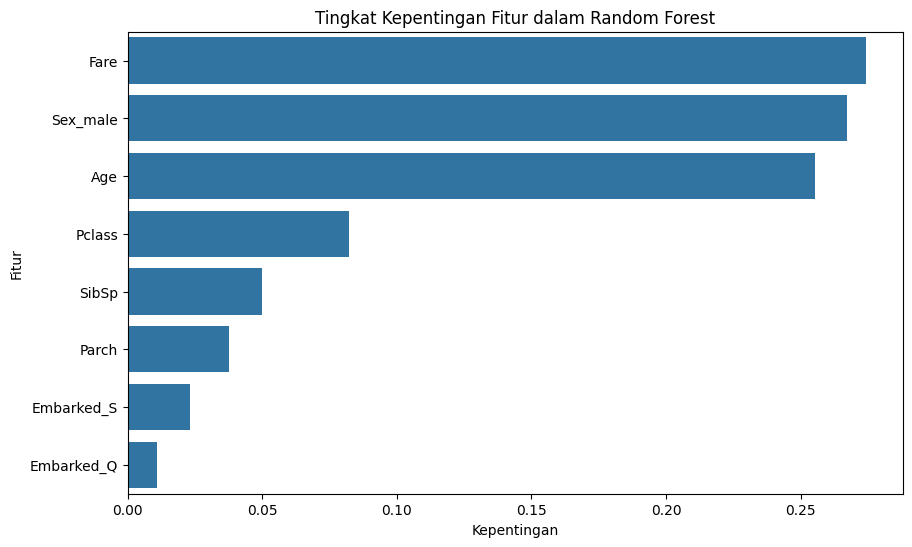

In [11]:
importances = model.feature_importances_  # Mendapatkan kepentingan fitur
features = X.columns
feature_importance_df = pd.DataFrame({'Fitur': features, 'Kepentingan': importances})
feature_importance_df = feature_importance_df.sort_values(by='Kepentingan', ascending=False)  # Mengurutkan

# Visualisasi
plt.figure(figsize=(10, 6))
sns.barplot(x='Kepentingan', y='Fitur', data=feature_importance_df)
plt.title('Tingkat Kepentingan Fitur dalam Random Forest')
plt.show()

### 8. Visualisasi Confusion Matrix

Penjelasan: Menggambarkan kinerja model dengan confusion matrix.

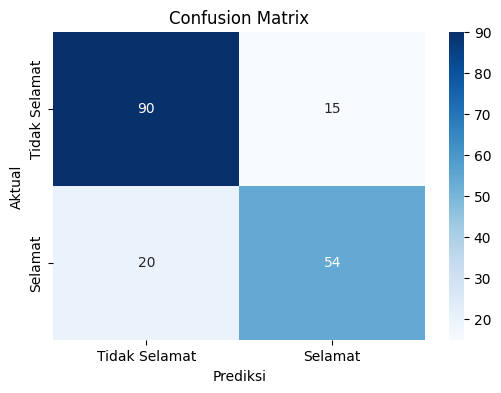

In [12]:
conf_matrix = confusion_matrix(y_test, y_pred)  # Membuat confusion matrix

# Visualisasi confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Tidak Selamat', 'Selamat'], yticklabels=['Tidak Selamat', 'Selamat'])
plt.title('Confusion Matrix')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.show()

### 9. Visualisasi ROC Curve dan AUC

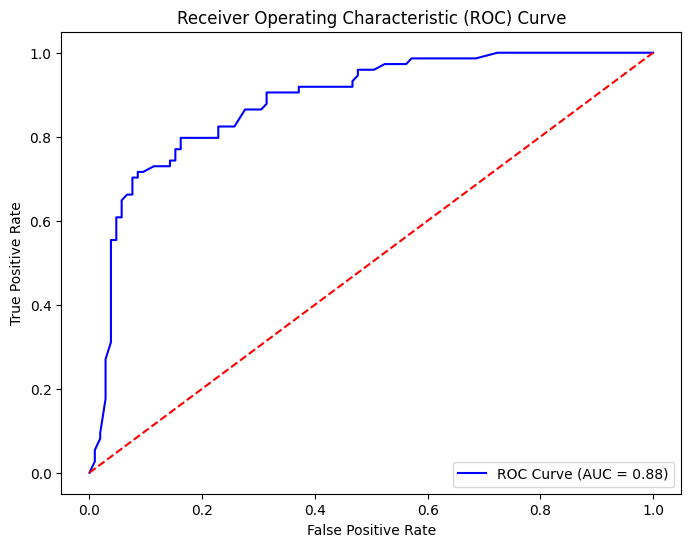

In [13]:
# Menghitung probabilitas prediksi untuk ROC
y_probs = model.predict_proba(X_test)[:, 1]  # Probabilitas untuk kelas '1' (Selamat)
fpr, tpr, thresholds = roc_curve(y_test, y_probs)  # Menghitung False Positive Rate dan True Positive Rate
roc_auc = auc(fpr, tpr)  # Menghitung AUC

# Visualisasi ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Garis referensi
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()